In [1]:
import math
import numpy as np
from scipy import optimize

In [2]:
def f(var):
    (x,y) = var
    
    first_eq = x * y - 2 * y - 2**x
    second_eq = math.log(x) - y - math.cos(x)
    
    return [first_eq,second_eq]

In [3]:
optimize.fsolve(f,(0.1,0))

array([ 0.66687559, -1.19090982])

In [4]:
def wymsol(var,parms,rtot,ltot):
    
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    (x1, x2, x3, x4, x5, x6) = var
    
    eq1 = x2 + 2*x3 + x4 + 2*x5 + 2*x6 - rtot
    eq2 = x1 + x4 + x5 + 2*x6 - ltot
    eq3 = l20 * x2**2 - x3
    eq4 = k11 * x1 * x2 - x4
    eq5 = l20 * k21 * x2**2 * x1 - x5
    eq6 = l20 * k21 * k22 * x2**2 * x1**2 - x6
    
    return np.array([eq1,eq2,eq3,eq4,eq5,eq6])

In [5]:
guess = (1.,1.,1.,1.,1.,1.)

In [6]:
parm = np.array([0.4,8.,2.,300.])

In [7]:
wymsol(guess,parm,0.01,0.01)

array([  7.99000000e+00,   4.99000000e+00,   2.99000000e+02,
        -6.00000000e-01,   2.39900000e+03,   4.79900000e+03])

In [8]:
f((0.1,0))

[-1.0717734625362931, -3.297589258272071]

In [9]:
optimize.fsolve(wymsol,guess,args=(parm,1.0,0.01))

array([  2.07234487e-03,   3.96771417e-02,   4.72282671e-01,
         3.28898884e-05,   7.82986056e-03,   3.24523427e-05])

In [10]:
optimize.root(wymsol,guess,args=(parm,1.0,0.01),method='lm').x

array([  2.07234487e-03,   3.96771417e-02,   4.72282671e-01,
         3.28898884e-05,   7.82986056e-03,   3.24523427e-05])

In [50]:
lig = np.array([0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2.0, 3.0, 5.0, 8.0, 10.0])
res = [optimize.root(wymsol,guess,args=(parm,1.0,i),method='lm').x for i in lig]

In [34]:
import sys

In [35]:
sys.path.append('./ligbind/')

In [36]:
import ligbind

In [37]:
ligs = ligbind.helpers.dilser()

In [38]:
b = [optimize.root(wymsol,guess,args=(parm,1.0,i),method='lm').x for i in ligs]

In [39]:
c = np.stack(b)

In [40]:
c[0]

array([  2.06060628e-04,   3.99676620e-02,   4.79224202e-01,
         3.29430462e-06,   7.89993921e-04,   3.25573287e-07])

In [41]:
d = np.array(b)

In [42]:
d[:,0]

array([  2.06060628e-04,   4.12381140e-04,   8.25803275e-04,
         1.65578221e-03,   3.32836084e-03,   6.72466252e-03,
         1.37272082e-02,   2.86160757e-02,   6.22949695e-02,
         1.48236969e-01,   4.10859340e-01,   1.22288605e+00,
         3.17154644e+00,   7.22662191e+00,   1.54005501e+01,
         3.17760901e+01,   6.45399995e+01,   1.30073988e+02])

In [43]:
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

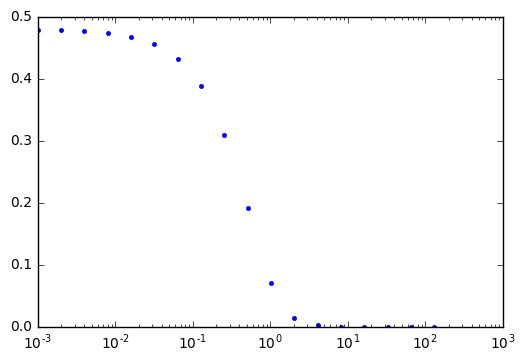

In [45]:
plt.semilogx(ligs,d[:,2],'.')

In [46]:
d[:,0]

array([  2.06060628e-04,   4.12381140e-04,   8.25803275e-04,
         1.65578221e-03,   3.32836084e-03,   6.72466252e-03,
         1.37272082e-02,   2.86160757e-02,   6.22949695e-02,
         1.48236969e-01,   4.10859340e-01,   1.22288605e+00,
         3.17154644e+00,   7.22662191e+00,   1.54005501e+01,
         3.17760901e+01,   6.45399995e+01,   1.30073988e+02])

In [47]:
parm

array([   0.4,    8. ,    2. ,  300. ])

In [48]:
a = ligbind.WymSim(parms=parm,sets=1)

In [49]:
d[:,0]

array([  2.06060628e-04,   4.12381140e-04,   8.25803275e-04,
         1.65578221e-03,   3.32836084e-03,   6.72466252e-03,
         1.37272082e-02,   2.86160757e-02,   6.22949695e-02,
         1.48236969e-01,   4.10859340e-01,   1.22288605e+00,
         3.17154644e+00,   7.22662191e+00,   1.54005501e+01,
         3.17760901e+01,   6.45399995e+01,   1.30073988e+02])